<img src = 'https://s3.ap-south-1.amazonaws.com/datahack-prod/contest_cover/final-grocery--cover.png'></img>
# Predict Big Mart Sale
The aim of this project is to build a predictive model, and use historical data to predict sales for each particular product in different stores.

Given sales data for 1559 products across 10 stores of the Big Mart chain in various cities. I will try to understand the properties of products and stores which play a key role in increasing sales.
</a>


## Hypothesis
**Hypothesis Generation**: Understanding the problem better by thinking possible factors that can impact the outcome.

I came up with the following hypothesis about the problem. Since we’re talking about stores and products, lets make different sets for each. So the idea is to find out the properties of a product, and store which impacts the sales of a product.

#### Store Level Hypotheses:####
1. **City type:** Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
2. **Population Density:** Stores located in densely populated areas should have higher sales because of more demand.
3. **Store Capacity:** Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
4. **Competitors:** Stores having similar establishments nearby should have less sales because of more competition.
5. **Marketing:** Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
6. **Location:** Stores located within popular marketplaces should have higher sales because of better access to customers.
7. **Customer Behavior:** Stores keeping the right set of products to meet the local needs of customers will have higher sales.
8. **Ambiance:** Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

#### Product Level Hypotheses:####

1. **Brand:** Branded products should have higher sales because of higher trust in the customer.
2. **Packaging:** Products with good packaging can attract customers and sell more.
3. **Utility:** Daily use products should have a higher tendency to sell as compared to the specific use products.
4. **Display Area:** Products which are given bigger shelves in the store are likely to catch attention first and sell more.
5. **Visibility in Store:** The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
6. **Advertising:** Better advertising of products in the store will should higher sales in most cases.
7. **Promotional Offers:** Products accompanied with attractive offers and discounts will sell more.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib
from scipy import stats
from scipy.stats import norm, skew 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

## Data
We have train (8,523) and test (5,681) data set. And 12 columns of attributes.

In [2]:
pd.read_csv('description.csv')

,Variable,Description
0,Item_Identifier,Unique product ID
1,Item_Weight,Weight of product
2,Item_Fat_Content,Whether the product is low fat or not
3,Item_Visibility,Total % display area of all products in a stor...
4,Item_Type,The category to which the product belongs
5,Item_MRP,Maximum Retail Price (list price) of the product
6,Outlet_Identifier,Unique store ID
7,Outlet_Establishment_Year,The year in which store was established
8,Outlet_Size,The size of the store in terms of ground area ...
9,Outlet_Location_Type,The type of city in which the store is located


In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [4]:
train.shape

(8523, 12)

Combine both train and test data sets into one, perform feature engineering and then divide them later again. This saves the trouble of performing the same steps twice on test and train. 

Combine them into a dataframe **all_data** with a **source** column specifying where each observation belongs.

In [5]:
train['Source']='train'
test['Source']='test'
all_data = pd.concat([train, test],ignore_index=True,join_axes=[train.columns])
print (train.shape, test.shape, all_data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [6]:
all_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


We can see that data has same number of columns but rows equivalent to combined both test and train. 

## Exploratory Data Analysis
Looking at categorical and continuous feature summaries and making inferences about the data.

#### * Numerical Observations:*

1. **Item_Visibility** has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.
2. **Outlet_Establishment_Years** vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.
3. The lower count of **Item_Weight** and **Item_Outlet_Sales** confirms the findings from the missing value check.

In [7]:
# Lets look at some basic statistics for numerical variables.
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


#### *Categorical Observations:*
Nominal (categorical) variable, lets have a look at the number of unique values in each of them. 

This tells us that there are 1559 products and 10 outlets/stores (which was also mentioned in problem statement). Another thing  is that **Item_Type** has 16 unique values. Let’s explore further using the frequency of different categories in each nominal variable. I’ll exclude the ID and source variables because we don't need it in our analysis.

The frequency of different categories in each nominal variables:

1. **Item_Fat_Content:** Some of *Low Fat* values mis-coded as *low fat* and *LF*. Also, some of *Regular* are mentioned as *regular*.
2. **Item_Type:** Not all categories have substantial numbers. It looks like combining them can give better results.
3. **Outlet_Type:** Supermarket Type2 and Type3 can be combined. But we should check if that’s a good idea before doing it.

In [8]:
# Filter categorical variables
categorical_columns = [x for x in all_data.dtypes.index if all_data.dtypes[x]=='object']

# Exclude ID column and Source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','Source']]

# Print frequency of categories
for col in categorical_columns:
    print('\nFrequency of categories for variable: %s'%col)
    print(all_data.groupby(col)[col].agg({' ':'count'}))   


Frequency of categories for variable: Item_Fat_Content
                      
Item_Fat_Content      
LF                 522
Low Fat           8485
Regular           4824
low fat            178
reg                195

Frequency of categories for variable: Item_Type
                           
Item_Type                  
Baking Goods           1086
Breads                  416
Breakfast               186
Canned                 1084
Dairy                  1136
Frozen Foods           1426
Fruits and Vegetables  2013
Hard Drinks             362
Health and Hygiene      858
Household              1548
Meat                    736
Others                  280
Seafood                  89
Snack Foods            1989
Soft Drinks             726
Starchy Foods           269

Frequency of categories for variable: Outlet_Size
                 
Outlet_Size      
High         1553
Medium       4655
Small        3980

Frequency of categories for variable: Outlet_Location_Type
                          
Ou

In [9]:
# Count the unique values in each features.
all_data.apply(lambda x: len(x.unique())).sort_values(ascending=False)

Item_Visibility              13006
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Identifier               1559
Item_Weight                    416
Item_Type                       16
Outlet_Identifier               10
Outlet_Establishment_Year        9
Item_Fat_Content                 5
Outlet_Type                      4
Outlet_Size                      4
Outlet_Location_Type             3
Source                           2
dtype: int64

## Data Cleaning
### Imputation of Missing values
Checking and replacing which columns contain missing values.   

In [10]:
all_data.apply(lambda x: sum(x.isnull())).sort_values(ascending=False)

Item_Outlet_Sales            5681
Outlet_Size                  4016
Item_Weight                  2439
Source                          0
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Item_MRP                        0
Item_Type                       0
Item_Visibility                 0
Item_Fat_Content                0
Item_Identifier                 0
dtype: int64

The **Item_Outlet_Sales** is the target variable and missing values are ones in the test set. So we need not worry about it. 

Impute the missing values in **Item_Weight** and **Outlet_Size**:

The **Grocery Store** clearly falls in the category **Small**. Replace those missing size levels by most common values or **mode**.

In [11]:
# Fill missing values for Item_Weight
all_data['Item_Weight'] = all_data.groupby('Item_Identifier')['Item_Weight'].apply(lambda x: x.fillna(x.mean()))

### Outlet size

Some entries in the features **Outlet_Size** are empty. To tackle that problem, let's explore sales in various outlets. Counting how many sales where reported by each outlet.

In [12]:
all_data.groupby(['Outlet_Type','Outlet_Identifier'])['Outlet_Identifier'].agg({'Total Sales':'count'})

Total Sales
Outlet_Type       Outlet_Identifier             
Grocery Store     OUT010                     925
                  OUT019                     880
Supermarket Type1 OUT013                    1553
                  OUT017                    1543
                  OUT035                    1550
                  OUT045                    1548
                  OUT046                    1550
                  OUT049                    1550
Supermarket Type2 OUT018                    1546
Supermarket Type3 OUT027                    1559

The two Grocery Stores **OUT010** and **OUT019** have reported far fewer sales than the Supermarkets. This is neatly illustrated by a boxplot.

In [13]:
# seaborn style
#sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=(15,6)

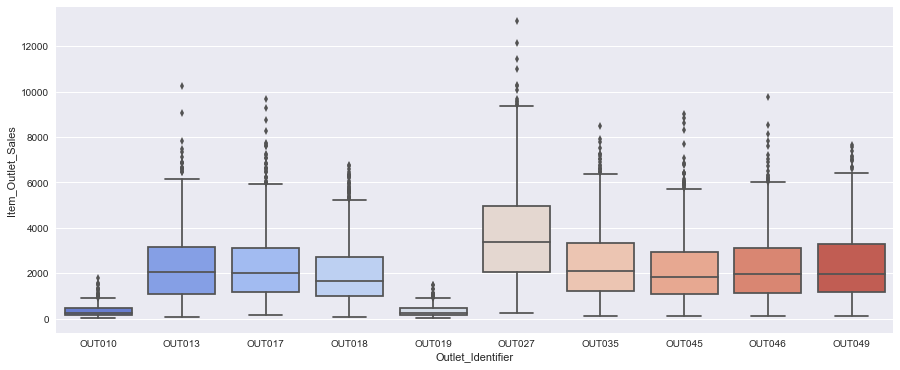

In [14]:
sorted_x = sorted(all_data['Outlet_Identifier'].unique())
sns.boxplot(x="Outlet_Identifier", y="Item_Outlet_Sales",data=all_data,order=sorted_x, palette="coolwarm");

In [15]:
# Fill missing values for Outlet_Size
all_data['Outlet_Size'] = all_data.groupby(['Outlet_Type'])['Outlet_Size'].apply( lambda x: x.fillna(x.mode()[0]))

## Feature Engineering 
I've explored some nuances in the data in the data exploration section. Lets modifying existing variables and creating new ones for analysis.

### Combining Outlet_Type
During exploration, the Supermarket Type2 and Type3 features have the same Output Size 'Medium'. But is that a good idea to combine these two features? A quick way to check is that could be the mean sales by type of store. If they have similar sales, then keeping them separate would be redundant.

In [16]:
all_data.groupby('Outlet_Type').aggregate({'Item_Outlet_Sales':np.mean})

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


This shows significant difference between Supermarket Type2 and Type3 features and we’ll leave them as it is.

### Modify Item_Visibility
I've noticed that the minimum value is **0**, which makes no sense. Lets consider it like missing information and impute it with mean/average visibility of the product.

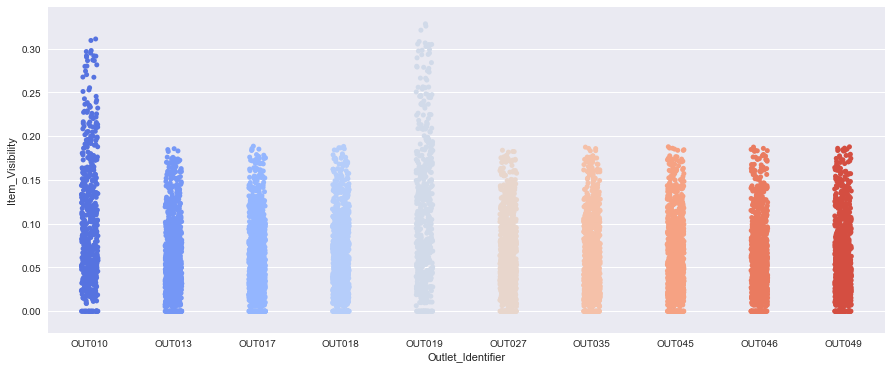

In [17]:
sorted_x = sorted(all_data['Outlet_Identifier'].unique())
sns.stripplot(x="Outlet_Identifier", y="Item_Visibility",data=train,order=sorted_x, palette="coolwarm",jitter=True);

In [18]:
all_data['Item_Visibility']= all_data['Item_Visibility'].map(lambda x: np.nan if x==0 else x)

In [19]:
visibility_avg = all_data.pivot_table(values='Item_Visibility', index='Item_Identifier', aggfunc='mean')

In [20]:
all_data['Item_Visibility'] = all_data.groupby('Item_Identifier')['Item_Visibility'].apply(lambda x: x.fillna(x.mean()))

### Create a new features based on Type of Item

The **Item_Type** features has 16 categories which might prove to be very useful in analysis. So its a good idea to combine them. One way could be to manually assign a new category to each. But if you look at the **Item_Identifier**, the **unique ID** of each item, it starts with either **FD, DR or NC.** 

If you see the categories, these look like being **(FD)Food, (DR)Drinks and (NC)Non-Consumables**. So I’ve used the **Item_Identifier** features to create a new column

In [21]:
all_data['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [22]:
# Get the first two characters of ID:
all_data['Item_Type2'] = all_data['Item_Identifier'].apply(lambda x: x[0:2])

# Rename them to more intuitive categories:
all_data['Item_Type2'] = all_data['Item_Type2'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
all_data['Item_Type2'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type2, dtype: int64

### Determine the years of operation of a store
Create a new column depicting the years of operation of a store. 

In [23]:
all_data['Outlet_Years'] = 2013 - all_data['Outlet_Establishment_Year']

Grouping sales by the type of outlet and the years it has existed.

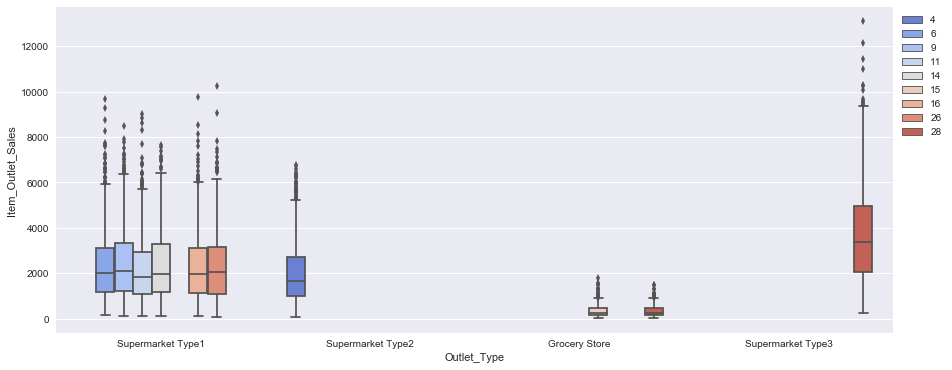

In [24]:
sorted_yr = sorted(all_data['Outlet_Years'].unique())
sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales",hue='Outlet_Years',hue_order=sorted_yr,data=all_data,
            palette="coolwarm")
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

Type of outlet and its size.

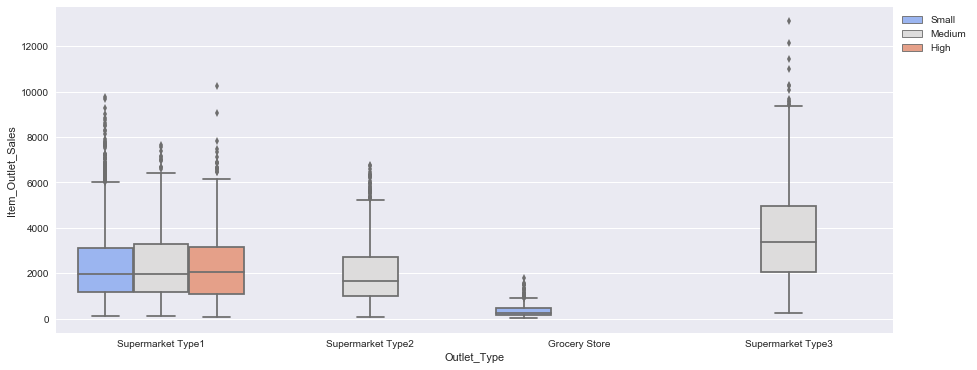

In [25]:
sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales",hue='Outlet_Size',hue_order=['Small','Medium','High'],data=all_data,
            palette="coolwarm")
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

Looking at sales figures for various item types, there are plenty of outliers.

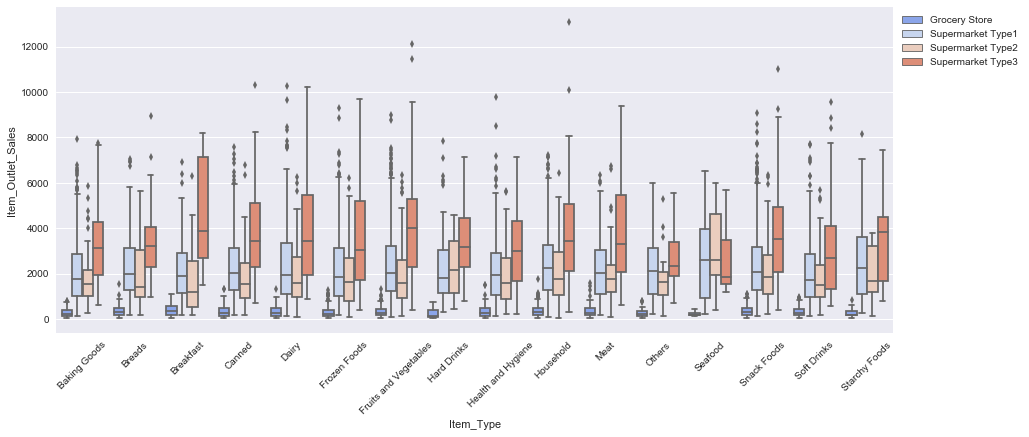

In [26]:
sorted_item = sorted(all_data['Item_Type'].unique())
ax = sns.boxplot(x="Item_Type", y="Item_Outlet_Sales",order=sorted_item,hue='Outlet_Type',hue_order=['Grocery Store','Supermarket Type1','Supermarket Type2','Supermarket Type3'],data=all_data,
            palette="coolwarm")
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

### Modify categories of Item_Fat_Content
I've found some typos in categories of Item_Fat_Content feature. Some of Low Fat values mis-coded as low fat and LF. Also, some of Regular are mentioned as regular.

In [27]:
#Change categories of low fat:
print('Original Categories:')
print(all_data['Item_Fat_Content'].value_counts())

all_data['Item_Fat_Content'] = all_data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print('\nModified Categories:')
print(all_data['Item_Fat_Content'].value_counts())


Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [28]:
# Mark Non-Consumables as separate category in Item_Fat_Content:
all_data.loc[all_data['Item_Type2']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
all_data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

### One-Hot Coding of Categorical variables
Since scikit-learn accepts only numerical variables, I converted all categories of nominal features into numeric data types.Using **LabelEncoder** from sklearn’s preprocessing module.

I created a new feature **Outlet** same as **Outlet_Identifier** because Outlet_Identifier should remain as it is, which it will be required in the submission file.

In [29]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#New variable for outlet
all_data['Outlet'] = le.fit_transform(all_data['Outlet_Identifier'])

In [30]:
categorical_features = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type2','Outlet_Type','Outlet']

for i in categorical_features:
    all_data[i] = le.fit_transform(all_data[i])

**One Hot Coding** refers to creating dummy variables, one for each category of a categorical features. 
**Item_Fat_Content** has 3 categories:
- **Low Fat** 
- **Regular** 
- **Non-Edible** 

One hot coding will remove this variable and generate 3 new variables. Each will have binary numbers: 

- **0** (if the category is not present)
- **1** (if category is present) 

This can be done using **get_dummies** function of Pandas.

In [31]:
# One Hot Coding:
all_data = pd.get_dummies(all_data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                                             'Item_Type2','Outlet'])

### Convert data back into train and test datasets.

In [32]:
#Drop the columns which have been converted to different types
all_data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train
train = all_data.loc[all_data['Source']=="train"]
test = all_data.loc[all_data['Source']=="test"]

#Drop unnecessary columns
train.drop(['Source'],axis=1,inplace=True)
test.drop(['Item_Outlet_Sales','Source'],axis=1,inplace=True)

#Export files as modified versions
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

## Data Correlations 

Looking at correlations between numerical variables a strong **positive correlation** of 0.57 between Item_MRP and Item_Outlet_Sales and a somewhat weaker **negative correlation** of -0.12 between Item_Visibility and Item_Outlet_Sales.

### Numerical features vs Target variable
Numerical features that are correlated to target variable **"Item_Outlet_Sales"**.

In [33]:
numerical_corr = all_data.iloc[:, 1:].select_dtypes(exclude=['object']).corr()
print (numerical_corr['Item_Outlet_Sales'].sort_values(axis=0,ascending=False).iloc[1:11])

Item_MRP                  0.567574
Outlet_Type_3             0.311192
Outlet_5                  0.311192
Outlet_Size_1             0.204701
Outlet_Type_1             0.108765
Outlet_Location_Type_1    0.058261
Outlet_6                  0.052823
Outlet_Years              0.049135
Outlet_Location_Type_2    0.046376
Outlet_9                  0.034264
Name: Item_Outlet_Sales, dtype: float64


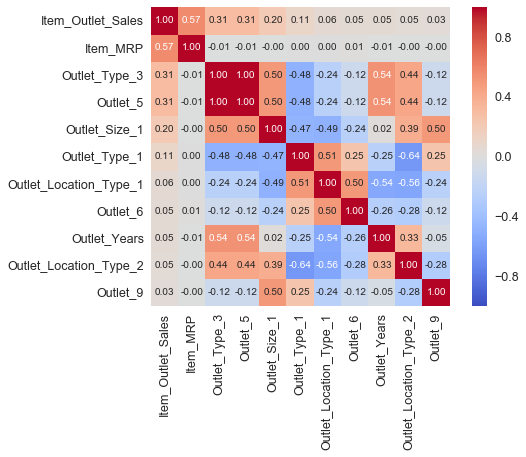

In [34]:
# Item_Outlet_Sales correlation matrix
corr_matrix= all_data.corr()

#number of variables for heatmap
k = 11 

cols = corr_matrix.nlargest(k, 'Item_Outlet_Sales')['Item_Outlet_Sales'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cmap='coolwarm', cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Building Model  
**Making predictive models on the data.**

Now that the data is ready, its time for me to start making predictive models. I will take through these models including:

   - **Linear Regression** 
   - **Ridge Regression**
   - **Decision Tree** 
   - **Random Forest **
   

 ## Performance Regression Evaluation Metrics**

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [35]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [36]:
# Define target variables and identifier
target_var = 'Item_Outlet_Sales'
id_col = ['Item_Identifier','Outlet_Identifier']

# Define function
def fitmodel(model, train, test, features, target_var, id_col, submit_name ):
    # Fit the model:
    model.fit(train[features], train[target_var])
        
    ## Predict training set
    train_prediction = model.predict(train[features])
    
    # Predict on testing data
    test[target_var] = model.predict(test[features])
    
    # Print model report
    print ("\nRoot Mean Squared Error")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target_var].values, train_prediction)))
    
    # Export submission file
    id_col.append(target_var)
    submission = pd.DataFrame({ x: test[x] for x in id_col})
    submission.to_csv(submit_name, index=False)

_______



## Linear Regression Model

In [37]:
# Define Independent variables
features = [x for x in train.columns if x not in [target_var] + id_col]

In [38]:
# Create an instance of a LinearRegression() model 
model = LinearRegression(normalize=True)
# Fit the model
fitmodel(model, train, test, features, target_var, id_col, 'submission.csv')


Root Mean Squared Error
RMSE : 1128


### First Submission: 
Public Leaderboard Score: **1201**

_______



## Ridge Regression Model

In [39]:
# Create an instance of a Ridge regression model 
model = Ridge(alpha=0.05,normalize=True)
# Fit the model
fitmodel(model, train, test, features, target_var, id_col, 'submission.csv')


Root Mean Squared Error
RMSE : 1129


### Second Submission: 
Public Leaderboard Score: **1203**

____


## Decision Tree Model

In [40]:
# Create an instance of a Decision tree model 
model = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
# Fit the model
fitmodel(model, train, test, features, target_var, id_col, 'submission.csv')


Root Mean Squared Error
RMSE : 1060


### Third Submission: 
Public Leaderboard Score: **1164**

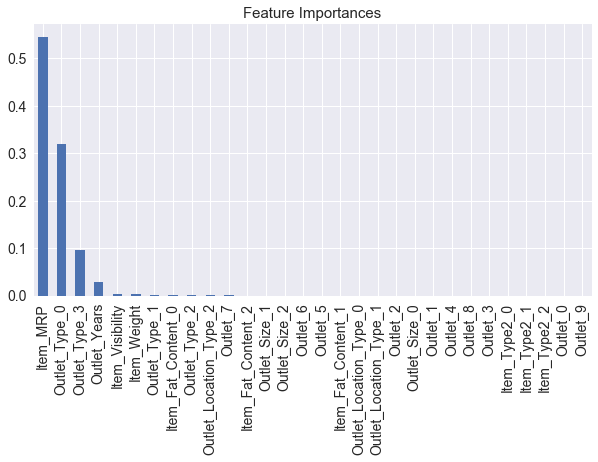

In [41]:
coef = pd.Series(model.feature_importances_, features).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importances',figsize=(10,5),fontsize=14);

In [42]:
top_features = coef.nlargest(10).index

____



**Lets try making a decision tree with just top features.**

In [43]:
# Define top10 features
features = top_features

In [44]:
model = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
fitmodel(model, train, test, features, target_var, id_col, 'submission.csv')


Root Mean Squared Error
RMSE : 1069


### Fourth Submission: 
Public Leaderboard Score: **1155**

___

## Random Forest Model


I tried a random forest model as well, and see if we get some improvements.

In [45]:
# Define Independent variables
features = [x for x in train.columns if x not in [target_var] + id_col]
# Create an instance of a Decision tree model 
model = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
# Fit the model
fitmodel(model, train, test, features, target_var, id_col, 'submission.csv')


Root Mean Squared Error
RMSE : 1073


Another random forest with max_depth of 6 and 600 trees. Increasing the number of trees makes the model robust but is computationally expensive.

In [46]:
model = RandomForestRegressor(n_estimators=600,max_depth=6, min_samples_leaf=100,n_jobs=4)
fitmodel(model, train, test, features, target_var, id_col, 'submission.csv')


Root Mean Squared Error
RMSE : 1068


### Fifth Submission: 
Public Leaderboard Score: **1152**

_______
## Boosting Algorithm

 - Gradient Boosting (GBM) 
 - XGBoost  
 - Ensemble techniques.

 